<a href="https://colab.research.google.com/github/rrohanj/MLREPO/blob/main/week6(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score
import time
import string
print("loading datasets....")
iris=load_iris()
df_sms=pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
        ,sep="\t",names=["label","message"])
print("\n"+"="*50)
print("PART A: K-NN Implementation")
print("="*50)
X_iris=iris.data[:,:2]
y_iris=iris.target
X_train,X_test,y_train,y_test=train_test_split(X_iris,y_iris,test_size=0.3,random_state=42)
k_values=[1,3,5,7,9]
results_knn=[]
for k in k_values:
  for metric in ["euclidean","manhattan"]:
    knn=KNeighborsClassifier(n_neighbors=k,metric=metric)
    knn.fit(X_train,y_train)
    acc=accuracy_score(y_test,knn.predict(X_test))
    results_knn.append([k,metric,acc])
    print(f"K={k},{metric}: Accuracy={acc:.3f}")

loading datasets....

PART A: K-NN Implementation
K=1,euclidean: Accuracy=0.711
K=1,manhattan: Accuracy=0.711
K=3,euclidean: Accuracy=0.756
K=3,manhattan: Accuracy=0.756
K=5,euclidean: Accuracy=0.778
K=5,manhattan: Accuracy=0.800
K=7,euclidean: Accuracy=0.800
K=7,manhattan: Accuracy=0.778
K=9,euclidean: Accuracy=0.800
K=9,manhattan: Accuracy=0.778


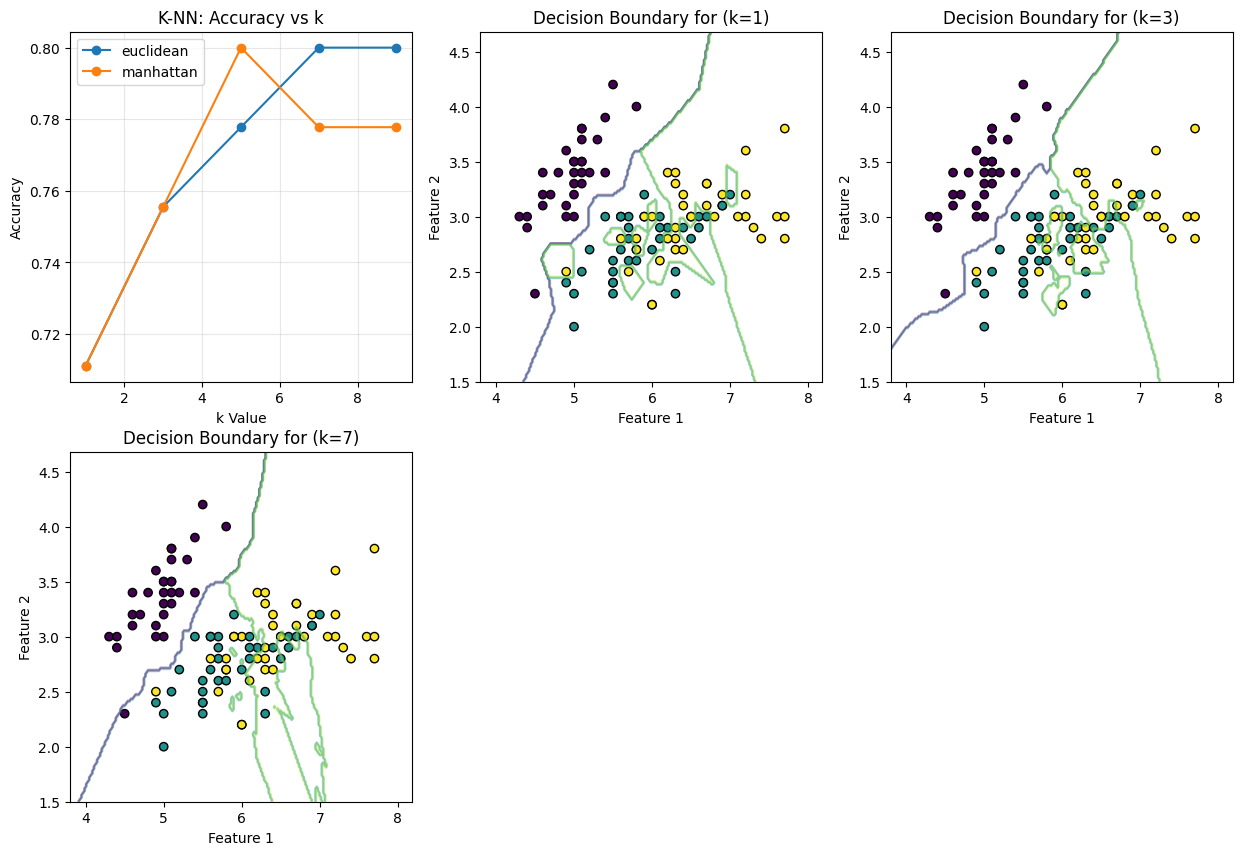

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
df_knn=pd.DataFrame(results_knn,columns=["k","metric","accuracy"])
for metric in ["euclidean","manhattan"]:
  data=df_knn[df_knn['metric']==metric]
  plt.plot(data["k"],data["accuracy"],marker="o",label=metric)
plt.xlabel('k Value')
plt.ylabel("Accuracy")
plt.title("K-NN: Accuracy vs k")
plt.legend()
plt.grid(True,alpha=0.3)

for idx,k in enumerate([1,3,7],2):
  plt.subplot(2,3,idx)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  x_min,x_max=X_train[:,0].min()-0.5,X_train[:,0].max()+0.5
  y_min,y_max=X_train[:,1].min()-0.5,X_train[:,1].max()+0.5
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
  Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  plt.contour(xx,yy,Z,alpha=0.3)
  plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor="k")
  plt.title(f"Decision Boundary for (k={k})")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")


In [13]:
print("\n"+"="*50)
print("PART B: NAIVE BAYES Implementation")
print("="*50)
df_sms['label']=df_sms['label'].map({"ham":0,"spam":1})
df_sms["processed"]=df_sms["message"].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True)
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(df_sms["processed"],df_sms["label"],test_size=0.3,random_state=42)
vectorizer=CountVectorizer(max_features=1000)
X_train_vec=vectorizer.fit_transform(X_train_s)
X_test_vec=vectorizer.transform(X_test_s)
X_train_num=np.array([(len(msg),len(msg.split())) for msg in X_train_s])
X_test_num=np.array([(len(msg),len(msg.split())) for msg in X_test_s])
mnb=MultinomialNB()
mnb.fit(X_train_vec,y_train_s)
y_pred_mnb=mnb.predict(X_test_vec)
acc_mnb=accuracy_score(y_test_s,y_pred_mnb)
print(f"Multinomial NB Accuracy: {acc_mnb:.3f}")
gnb=GaussianNB()
gnb.fit(X_train_num,y_train_s)
y_pred_gnb=gnb.predict(X_test_num)
acc_gnb=accuracy_score(y_test_s,y_pred_gnb)
print(f"Gaussian NB Accuracy: {acc_gnb:.3f}")


PART B: NAIVE BAYES Implementation
Multinomial NB Accuracy: 0.984
Gaussian NB Accuracy: 0.865



Probability comparison (first 3 samples)
Sample 1: MNB[ham=1.000, spam=0.000]
GNB [ham=0.478,spam=0.522]
Sample 2: MNB[ham=1.000, spam=0.000]
GNB [ham=0.497,spam=0.503]
Sample 3: MNB[ham=1.000, spam=0.000]
GNB [ham=0.671,spam=0.329]

PART C: Algorithm Comparison

Algorithm Comparison Table
           Algorithm Train Time(ms) Pred Time(ms) Accuracy Precision Recall
          K_NN(Iris)           2.29          4.18    0.778     0.778  0.778
   Gaussian NB(Iris)           1.84          0.46    0.822     0.834  0.822
          K_NN (SMS)           1.62        911.42    0.925     0.931  0.925
Multinomial NB (SMS)         157.53         12.64    0.984     0.985  0.984
   Gaussian NB (SMS)           5.04          0.77    0.865     0.897  0.865


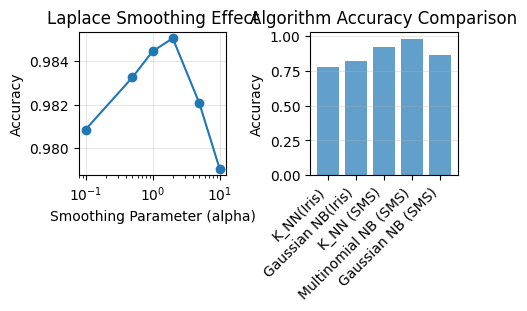

In [20]:
plt.subplot(2,3,5)
alphas=[0.1,0.5,1.0,2.0,5.0,10.0]
accuracies_smoothing=[]
for alpha in alphas:
  mnb_smooth=MultinomialNB(alpha=alpha)
  mnb_smooth.fit(X_train_vec, y_train_s)
  y_pred_smooth = mnb_smooth.predict(X_test_vec)
  acc_smooth = accuracy_score(y_test_s, y_pred_smooth)
  accuracies_smoothing.append(acc_smooth)

plt.plot(alphas, accuracies_smoothing, marker="o")
plt.xscale("log")
plt.xlabel("Smoothing Parameter (alpha)")
plt.ylabel("Accuracy")
plt.title("Laplace Smoothing Effect")
plt.grid(alpha=0.3)

print("\nProbability comparison (first 3 samples)")
probs_mnb=mnb.predict_proba(X_test_vec)[:3]
probs_gnb=gnb.predict_proba(X_test_num)[:3]
for i in range(3):
  print(f"Sample {i+1}: MNB[ham={probs_mnb[i][0]:.3f}, spam={probs_mnb[i][1]:.3f}]")
  print(f"GNB [ham={probs_gnb[i][0]:.3f},spam={probs_gnb[i][1]:.3f}]")
print("\n"+"="*50)
print("PART C: Algorithm Comparison")
print("="*50)
def evaluate_algo(model,X_train,X_test,y_train,y_test,name):
  start=time.time()
  model.fit(X_train,y_train)
  train_time=time.time()-start
  start=time.time()
  y_pred=model.predict(X_test)
  pred_time=time.time()-start
  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred,average="weighted",zero_division=0)
  rec=recall_score(y_test,y_pred,average="weighted",zero_division=0)
  return {
      "Algorithm":name,
      "Train Time(ms)":f"{train_time*1000:.2f}",
      "Pred Time(ms)":f"{pred_time*1000:.2f}",
      "Accuracy": f"{acc:.3f}",
      "Precision": f"{prec:.3f}",
      "Recall": f"{rec:.3f}"
  }
results=[]
results.append(evaluate_algo(KNeighborsClassifier(n_neighbors=5),X_train,X_test,y_train,y_test,"K_NN(Iris)"))
results.append(evaluate_algo(GaussianNB(),X_train,X_test,y_train,y_test,"Gaussian NB(Iris)"))
results.append(evaluate_algo(KNeighborsClassifier(n_neighbors=5),
               X_train_vec.toarray(),X_test_vec.toarray(),y_train_s,y_test_s,"K_NN (SMS)"))
results.append(evaluate_algo(MultinomialNB(),X_train_vec.toarray(),X_test_vec.toarray(),y_train_s,y_test_s,"Multinomial NB (SMS)"))
results.append(evaluate_algo(GaussianNB(),X_train_num,X_test_num,y_train_s,y_test_s,"Gaussian NB (SMS)"))
df_comparison=pd.DataFrame(results)
print("\nAlgorithm Comparison Table")
print(df_comparison.to_string(index=False))

plt.subplot(2,3,6)
x_pos=np.arange(len(results))
accuracies=[float(r["Accuracy"]) for r in results]
plt.bar(x_pos,accuracies,alpha=0.7)
plt.xticks(x_pos,[r["Algorithm"] for r in results],rotation=45,ha="right")
plt.ylabel("Accuracy")
plt.title("Algorithm Accuracy Comparison")
plt.grid(True,alpha=0.3,axis="y")
plt.tight_layout()
plt.show()